In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


# Physical constants
hbar = 6.582119569e-16  # eV s
m0 = 9.10938356e-31     # kg
e0 = 1.602176634e-19    # C

# Derived unit scaling: hbar^2 / m0 in eV A^2
# (10^20 converts m^2 to Angstrom^2)
etam = (hbar**2 * e0 * 1e20) / m0 

muB = 5.7883818e-2      # meV/T
meVpK = 8.617333262e-2  # meV/K

print(f"Constants initialized. eta_m = {etam:.4f} eV A^2")

Constants initialized. eta_m = 7.6200 eV A^2


In [6]:
# System Geometry
Nx = 306          # Number of sites (wire + barrier regions)
a0 = 100.0        # Unit cell size in Angstroms

# Material Parameters
ms = 0.023        # Effective mass
alpha_s_val = 140.0 / a0  # Rashba coupling (meV)

# Superconductivity Parameters
Delta0 = 0.3      # Parent SC gap (meV)
Gamma_sc = 0.2    # SM-SC coupling strength (meV)

# Derived Parameters
# Hopping energy t (meV) -> 1000 converts eV to meV
ts = 1000 * etam / (2 * a0**2 * ms) 

# Induced Gap and Renormalization (integrate-out approximation)
Z = Delta0 / (Delta0 + Gamma_sc)
Delta = Delta0 * Gamma_sc / (Delta0 + Gamma_sc)

print("System Parameters:")
print(f"  Hopping (ts): {ts:.4f} meV")
print(f"  Rashba (alpha): {alpha_s_val:.4f} meV")
print(f"  Induced Gap (Delta): {Delta:.4f} meV")
print(f"  Renormalization (Z): {Z:.4f}")

System Parameters:
  Hopping (ts): 16.5651 meV
  Rashba (alpha): 1.4000 meV
  Induced Gap (Delta): 0.1200 meV
  Renormalization (Z): 0.6000


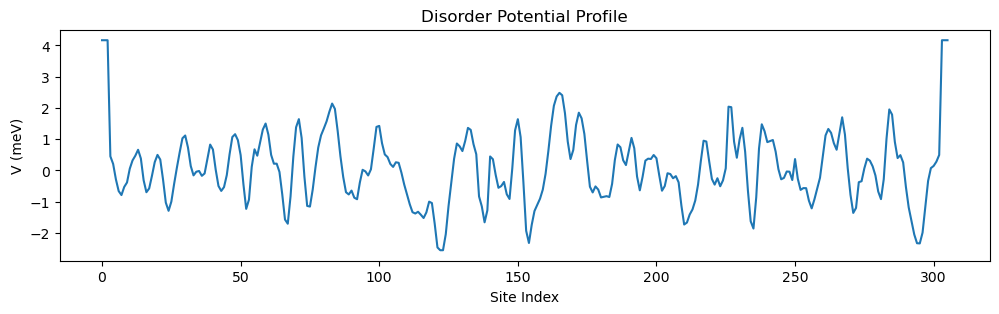

In [7]:
Vdiss = np.array([
    4.167, 4.167, 4.167, 0.452874, 0.21002, -0.284492, -0.659038, -0.786086, 
    -0.525799, -0.38377, 0.0566635, 0.322575, 0.47192, 0.662315, 0.384357, 
    -0.312115, -0.69525, -0.574579, -0.17187, 0.265048, 0.498968, 0.349402, 
    -0.28886, -1.02809, -1.28968, -0.995924, -0.430435, 0.0916559, 0.578167, 
    1.03006, 1.11903, 0.73348, 0.142864, -0.156246, -0.0399484, -0.0154498, 
    -0.170972, -0.0951919, 0.374153, 0.828708, 0.671003, 0.0261068, -0.49542, 
    -0.653214, -0.531546, -0.146962, 0.517033, 1.07006, 1.16082, 0.970738, 
    0.491015, -0.438995, -1.228, -0.93252, 0.116177, 0.677326, 0.473787, 
    0.894253, 1.30834, 1.50161, 1.14759, 0.49782, 0.21694, 0.21838, -0.0467326, 
    -0.757523, -1.56948, -1.70291, -0.828864, 0.438255, 1.38332, 1.64262, 
    1.04052, -0.196065, -1.13378, -1.15416, -0.607921, 0.104589, 0.737551, 
    1.12481, 1.34214, 1.57144, 1.87796, 2.14067, 1.97054, 1.26508, 0.453383, 
    -0.207544, -0.695028, -0.766371, -0.643513, -0.870116, -0.918961, -0.3858, 
    0.0218848, -0.0283636, -0.158753, 0.0372964, 0.700059, 1.39411, 1.42632, 
    0.871495, 0.513397, 0.428477, 0.209594, 0.114257, 0.26281, 0.24527, 
    -0.0700469, -0.446987, -0.766343, -1.07829, -1.33398, -1.37623, -1.32052, 
    -1.41463, -1.51993, -1.34015, -0.996566, -1.04251, -1.70012, -2.46144, 
    -2.55056, -2.55056, -2.03636, -1.13528, -0.376687, 0.37462, 0.862945, 
    0.773755, 0.621231, 0.943651, 1.36241, 1.29923, 0.842148, 0.519563, 
    -0.830196, -1.14864, -1.65801, -1.27588, 0.448467, 0.360344, -0.139305, 
    -0.553087, -0.499198, -0.366472, -0.761165, -0.91112, 0.0754531, 1.28353, 
    1.64107, 1.06869, -0.370529, -1.92947, -2.31937, -1.74207, -1.29614, 
    -1.10253, -0.902068, -0.611232, -0.107775, 0.618683, 1.42857, 2.07159, 
    2.36802, 2.48358, 2.40696, 1.83057, 0.92405, 0.365879, 0.657959, 1.45747, 
    1.84893, 1.66872, 1.16706, 0.30081, -0.519329, -0.702022, -0.509419, 
    -0.610614, -0.861853, -0.840651, -0.821486, -0.848154, -0.429494, 0.338117, 
    0.83166, 0.743637, 0.32598, 0.173883, 0.612693, 1.04265, 0.711198, 
    -0.191321, -0.635027, -0.202864, 0.314312, 0.37837, 0.367477, 0.495562, 
    0.391449, -0.149983, -0.646626, -0.498146, -0.0884465, -0.113862, 
    -0.247957, -0.179923, -0.379681, -1.12113, -1.72834, -1.66511, -1.40732, 
    -1.24693, -0.961002, -0.453292, 0.294333, 0.952484, 0.926187, 0.307074, 
    -0.270116, -0.451926, -0.248375, -0.504476, -0.317154, 0.0696261, 2.04143, 
    2.02502, 0.922446, 0.408673, 0.996308, 1.36585, 0.597821, -0.64502, 
    -1.62492, -1.85679, -0.855313, 0.702727, 1.47753, 1.25715, 0.907288, 
    0.941967, 0.975336, 0.603644, 0.042137, -0.281761, -0.236557, -0.0327036, 
    -0.0381532, -0.304866, 0.36493, -0.268754, -0.619861, -0.563511, -0.565465, 
    -0.965443, -1.21149, -0.920027, -0.579462, -0.232793, 0.454877, 1.12119, 
    1.32896, 1.20331, 0.872942, 0.663642, 1.17223, 1.70069, 1.14962, 0.0737236, 
    -0.776288, -1.35719, -1.19802, -0.374519, -0.343096, 0.0703165, 0.377709, 
    0.313998, 0.13212, -0.159962, -0.671412, -0.916253, -0.279789, 1.01931, 
    1.95293, 1.7881, 0.916355, 0.3977869, 0.490675, 0.2577821, -0.530294, 
    -1.18016, -1.60528, -2.04495, -2.32656, -2.33286, -1.98784, -1.17538, 
    -0.332732, 0.0751958, 0.145942, 0.283438, 0.496432, 4.167, 4.167, 4.167
])

# Ensure Nx matches Vdiss length just in case
if len(Vdiss) != Nx:
    print(f"Warning: Nx ({Nx}) does not match Vdiss length ({len(Vdiss)}). Updating Nx.")
    Nx = len(Vdiss)


def vn_stats(vds):
    v = np.array(vds)
    moments = [
        np.sum(v),
        np.sum(v**2),
        np.sum(v**3),
        np.sum(v**4)
    ]
    return np.array(moments) / len(v)

plt.figure(figsize=(12, 3))
plt.plot(Vdiss)
plt.title("Disorder Potential Profile")
plt.xlabel("Site Index")
plt.ylabel("V (meV)")
plt.show()



In [8]:
def build_Hsm(gamma_val, mu_val, V0_val):
    """
    Constructs the Normal State (Semiconductor) Hamiltonian matrix.
    Args:
        gamma_val: Zeeman field (Gamma)
        mu_val: Chemical potential
        V0_val: Amplitude of disorder potential
    """
    dim = 2 * Nx
    H = np.zeros((dim, dim), dtype=complex)
    
    # On-site energy offset (Band bottom)
    epsilon0 = 2 * ts * np.cos(np.pi / (Nx + 1.0))
    
    # 1. On-site terms (Diagonal and Zeeman)
    for ii in range(Nx):
        # Indices for spin UP and DOWN at site ii
        # Mathematica: 2*ii-1, 2*ii -> Python: 2*ii, 2*ii+1
        i_up = 2 * ii
        i_dn = 2 * ii + 1
        
        # Diagonal term: eps0 - mu + V_disorder
        diag_val = epsilon0 - mu_val + V0_val * Vdiss[ii]
        
        H[i_up, i_up] = diag_val
        H[i_dn, i_dn] = diag_val
        
        # Zeeman splitting (off-diagonal in spin)
        H[i_up, i_dn] = gamma_val
        H[i_dn, i_up] = gamma_val

    # 2. Hopping and Rashba terms (Nearest Neighbor)
    for ii in range(Nx - 1):
        i_up = 2 * ii
        i_dn = 2 * ii + 1
        j_up = 2 * (ii + 1)
        j_dn = 2 * (ii + 1) + 1
        
        # Kinetic Hopping (-ts)
        H[i_up, j_up] = -ts
        H[j_up, i_up] = -ts  # Hermitian
        
        H[i_dn, j_dn] = -ts
        H[j_dn, i_dn] = -ts  # Hermitian
        
        # Rashba Coupling
        # Mathematica: htp[[2ii-1, 2ii+2]] = 0.5*alpha
        # Python: H[i_up, j_dn] = 0.5 * alpha
        H[i_up, j_dn] = 0.5 * alpha_s_val
        H[j_dn, i_up] = 0.5 * alpha_s_val
        
        # Mathematica: htp[[2ii, 2ii+1]] = -0.5*alpha
        # Python: H[i_dn, j_up] = -0.5 * alpha
        H[i_dn, j_up] = -0.5 * alpha_s_val
        H[j_up, i_dn] = -0.5 * alpha_s_val

    # Apply renormalization factor Z
    return Z * H



def build_HDelta():
    """
    Constructs the Superconducting Pairing Hamiltonian.
    """
    dim = 2 * Nx
    H = np.zeros((dim, dim), dtype=complex)
    
    for ii in range(Nx):
        i_up = 2 * ii
        i_dn = 2 * ii + 1
        
        # s-wave pairing: Delta * (c_up c_dn - c_dn c_up)
        # In BdG off-diagonal block
        H[i_up, i_dn] = Delta
        H[i_dn, i_up] = -Delta
        
    return H


def build_Heff(gamma_val, mu_val, V0_val):
    """
    Constructs the full Bogoliubov-de Gennes (BdG) Hamiltonian.
    Structure:
      [ Hsm       HDelta ]
      [ -HDelta* -Hsm* ]
    """
    Hsm = build_Hsm(gamma_val, mu_val, V0_val)
    HD = build_HDelta()
    
    # Note: In standard BdG, bottom right is -Hsm*. 
    # The notebook uses -Transpose[Hsm]. For real Hsm, they are identical.
    
    top = np.hstack([Hsm, HD])
    bottom = np.hstack([-np.conj(HD), -np.conj(Hsm).T]) # Or -Hsm.T if real
    
    return np.vstack([top, bottom])

In [9]:
def get_psiM_density(eigenvectors, energies, state_index_n):
    """
    Calculates the spatial probability density of the Majorana modes.
    Based on the 'psiM' function in the notebook.
    
    Args:
        eigenvectors: matrix of eigenvectors (columns) or array (rows) depending on solver
        energies: array of eigenvalues
        state_index_n: 1-based index from the positive energy spectrum
                       (1 = lowest positive energy)
    """
    # Sort eigenvalues/vectors if not already sorted
    idx_sorted = np.argsort(energies)
    sorted_vecs = eigenvectors[:, idx_sorted] # Columns are eigenvectors
    
    # Index logic from notebook: 2*Nx + nn 
    # (Since total size is 4*Nx, indices 0 to 2Nx-1 are negative E)
    # Python 0-based: 2*Nx + (n-1)
    
    # Identify the particle-hole partner states
    # ptp1 -> Positive energy state
    idx1 = 2 * Nx + (state_index_n - 1)
    vec1 = sorted_vecs[:, idx1]
    
    # ptp2 -> Negative energy partner
    # Notebook: 2*Nx - nn + 1 => Python: 2*Nx - state_index_n
    idx2 = 2 * Nx - state_index_n
    vec2 = sorted_vecs[:, idx2]
    
    # Notebook Phase correction (ix=10 means site 5 roughly)
    # This aligns the phase of the electron/hole components
    ix = 10 # Arbitrary reference site index for phase locking
    
    # Phase fix for vec1
    # Note: In Python vector, indices are [2*site, 2*site+1, ...]
    # Notebook (2(ix-1)+1) is roughly index 18 (spin up)
    ref_idx = 2 * (ix - 1)
    phase1 = np.conj(vec1[ref_idx]) / np.abs(vec1[ref_idx] + 1e-20)
    ptp1 = vec1 * phase1
    
    # Phase fix for vec2
    phase2 = np.conj(vec2[ref_idx]) / np.abs(vec2[ref_idx] + 1e-20)
    ptp2 = vec2 * phase2
    
    # Construct Majorana basis gamma_A, gamma_B
    ya = (ptp1 + ptp2) / np.sqrt(2.0)
    yb = (ptp1 - ptp2) / np.sqrt(2.0)
    
    # Calculate densities summed over spin and electron/hole
    rho_a = []
    rho_b = []
    
    for ii in range(Nx):
        # Electron Spin Up/Down
        e_up = 2 * ii
        e_dn = 2 * ii + 1
        # Hole Spin Up/Down (offset by 2*Nx)
        h_up = 2 * Nx + 2 * ii
        h_dn = 2 * Nx + 2 * ii + 1
        
        # Density A
        val_a = (np.abs(ya[e_up])**2 + np.abs(ya[e_dn])**2 + 
                 np.abs(ya[h_up])**2 + np.abs(ya[h_dn])**2)
        rho_a.append(val_a)
        
        # Density B
        val_b = (np.abs(yb[e_up])**2 + np.abs(yb[e_dn])**2 + 
                 np.abs(yb[h_up])**2 + np.abs(yb[h_dn])**2)
        rho_b.append(val_b)
        
    return np.array(rho_a), np.array(rho_b)

Running simulation with V0=0.0, mu=0.2, Gamma=0.5...
Diagonalizing 1224x1224 matrix...

Lowest Energy States (micro-eV):
[-73.28625676 -69.45888873  -0.19662629   0.19662629  69.45888873
  73.28625676]


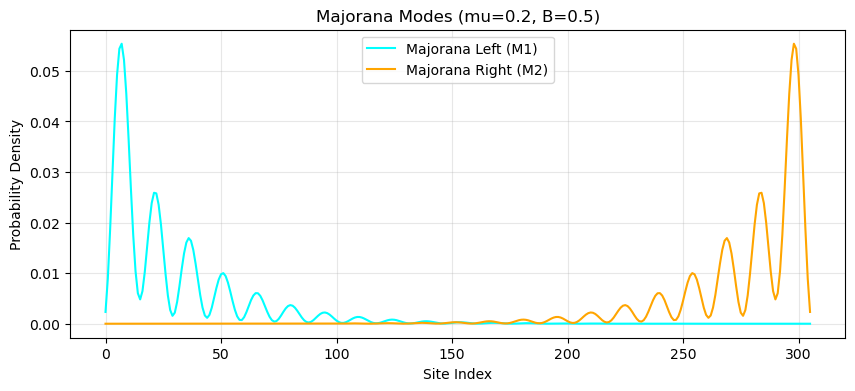

In [10]:
# Parameters for this specific run
V0_ex = 0.0      # Disorder amplitude
mu_ex = 0.2      # Chemical potential
gm_ex = 0.5      # Zeeman field

print(f"Running simulation with V0={V0_ex}, mu={mu_ex}, Gamma={gm_ex}...")

# 1. Build Hamiltonian
Heff = build_Heff(gm_ex, mu_ex, V0_ex)

# 2. Diagonalize
print(f"Diagonalizing {Heff.shape[0]}x{Heff.shape[0]} matrix...")
eigvals, eigvecs = la.eigh(Heff)

# 3. Output lowest energies
# Get indices near zero energy (middle of the spectrum)
mid_idx = 2 * Nx 
energies_to_print = eigvals[mid_idx-3 : mid_idx+3]
print("\nLowest Energy States (micro-eV):")
print(energies_to_print * 1000) # Convert meV to ueV

# 4. Calculate Majorana Modes
rho_M1, rho_M2 = get_psiM_density(eigvecs, eigvals, state_index_n=1)

# 5. Plot
plt.figure(figsize=(10, 4))
x_axis = np.arange(Nx) * (a0/10000) # Converting A to microns approx? 
# Notebook uses 'ass' = a0 * 10^-4.

plt.plot(rho_M1, label='Majorana Left (M1)', color='cyan')
plt.plot(rho_M2, label='Majorana Right (M2)', color='orange')
plt.title(f"Majorana Modes (mu={mu_ex}, B={gm_ex})")
plt.xlabel("Site Index")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()